# 畳み込みニューラルネットワーク

-  Convolutional neural network (CNN) とも呼ばれる
-  画像認識や音声認識などに使用されている。
-  画像認識コンペティションで多くが利用 (ILSVRC - ImageNet Large-Scale Visual Recognition Challenge)。
-  その他にも、動画解析、自然言語認識、新薬発見、囲碁なども（Wiki参照）

## CNNの構造 (7.1)
以下の２つの層からなる
-  Convolutionレイヤー（畳み込み層）
-  Poolingレイヤー　（プーリング層 - 省略されることがある）

## CNNの特徴 (7.1)
主な特徴として、Affineレイヤーとして実装した全結合（fully-connected）ネットワークと異なる。


__全結合ネットワークの例__
<img src="./img/7-1a.png" />

__CNNネットワークの例__
<img src="./img/7-1b.png" />
*畳み込みレイヤがAffineレイヤを置き換え、さらに活性化関数の出力をプーリングレイヤで処理する。最後の出力層ではAffineレイヤが使われる。*


***

# 全結合層の問題点(7.2.1)
- ２次元、３次元のデータを１次元に変換してしまう（形状が損失）。

## 畳み込み層の利点
- 近いピクセルの方が、遠いピクセルより関わりがある。
- RGBのチャンネル間にも密接な関連性が
- 畳み込み層は、３次元の入力データ（入力特徴マップ ー Input Feature Map）を同じく３次元の出力データ（出力特徴マップ　ー　Output Feature Map）で次の層に送るので形状が保たれる。

# 畳み込み層演算
__画像処理でいうフィルター演算__
<img src="./img/7-2-2a.png" />

***

__畳み込み演算の流れ__<br/>
*フィルターを一定間隔でスライドさせながら、それぞれの場所でフィルターと入力の対応する要素の積を求め、その和を出力（__積和演算__）*
<img src="./img/7-2-2b.png" />

***

__畳み込み演算のバイアス__<br/>
*畳み込み演算ではバイアスの加算もある。フィルターを重みパラメーターとみなせば、バイアスを足すと全結合ネットワークと同じ演算（__X＊W＋B__）となる。但し、フィルター適用後の要素（図では４つ）に対し、バイアスは一つのみ。それぞれの要素に同じ値を加算する。*
<img src="./img/7-2-2c.png" />

***

__パディング__<br/>
入力データの周囲に、一定の幅の固定データ（０など）を埋める処理。出力データのサイズを調整できる。畳み込み演算では、繰り返すたびに空間的に縮小するため、ある時点で出力サイズが１になってしまうことを防ぐ。以下の例では、４x４の入力サイズに対し、４x４の出力サイズを保つ。
<img src="./img/7-2-3.png" />

***

__ストライド__<br/>
フィルターを適用する際の動かす位置の間隔（前例ではストライド１）。以下の例ではストライド２。ストライドを大きくすると、出力サイズは小さくなる。
<img src="./img/7-2-4.png" />

入力サイズ（H,W）とフィルターサイズ（FH、FW）、出力サイズを（OH, OW）、パディングをP、ストライドをSとすると出力サイズは、以下の式で計算できる。<br/>
<br/>
__
$$OH = \frac{H+2P-FH}{S} + 1$$
$$OW = \frac{W+2P-FW}{S} + 1$$
__
<br/>
入力（4,4）、フィルター(3,3)、パディング(1)、ストライド(1)

$$OH = \frac{4+2\cdot1-3}{1} + 1 = 4$$
$$OW = \frac{4+2\cdot1-3}{1} + 1 = 4$$

入力（7,7）、フィルター(3,3)、パディング(0)、ストライド(2)

$$OH = \frac{7+2\cdot0-3}{2} + 1 = 3$$
$$OW = \frac{7+2\cdot0-3}{2} + 1 = 3$$

入力（28,31）、フィルター(3,3)、パディング(1)、ストライド(1)

$$OH = \frac{28+2\cdot2-5}{3} + 1 = 10$$
$$OW = \frac{31+2\cdot2-5}{3} + 1 = 11$$

__注意点__<br/>
式の結果は整数でないといけないので、出力サイズが割り切れるように値を設定するか、エラーを出すなどして実装する。<br/>最も近い整数に丸めてしまう実装方法もある。
***


# 3次元データの畳み込み演算(7.2.6)
縦、横の２次元の形状に加え、奥行き（チャンネル）を加えた３次元の形状を対象とした演算もできる。その際、チャンネル毎に入力データとフィルターの畳み込み演算を行い、その結果を加算する。そのため、出力データはチャンネル数が１に減る。
<img src="./img/7-2-5.png" />
<br/>
__３次元畳み込み演算の手順__
<br/>
<img src="./img/7-2-5b.png" />

__注意点__
入力データのチャンネル数に対し、同じチャンネル数のフィルターを用意する必要がある。フィルターのサイズに制約はない。

# 3次元の畳み込み演算をブロックで考える。(7.2.6)
データやフィルターを直方体のブロックで考えると分かり易い。３次元データを多次元配列で表す時は、（Channel, Height, Width）の順に並べて書く。チャンネル数C、高さH、横幅Wのデータは（C,H,W）と書く。

同じく、フィルターも、チャンネル数C、高さFH(Filter Height)、横幅FW(Filter Width)の場合、(C,FH,FW)と書く。

<img src="./img/7-2-6.png" />

フィルターを複数（FN個）使えば、出力マップもチャンネル方向に複数個（FN個）出力できる。

<img src="./img/7-2-6b.png" />

さらに、バイアスも（FN個）加算することができる。フィルターの出力に対しチャンネル方向分、同じ値が加算される。

<img src="./img/7-2-6d.png" />

# バッチ処理(7.2.7)

バッチ数、チャンネル数、高さ、横幅（N,C,H,W）の順に４次元のデータとして格納することによって、畳み込み演算もバッチ処理に対応可能。

<img src="./img/7-2-6e.png" />

***

# プーリング層(7.3)
プーリング演算によって、縦、横の空間を小さくできる。以下の例では、2x2の領域の最大値を取り（Maxプーリング）、１つにまとめている。平均値を取るAverageプーリングもあるが、画像認識では、Maxプーリングが主に使われている。

<img src="./img/7-3.png" />

一般的に、プーリングのウインドウのサイズとストライドは同じ値に設定する。上の例（2x2）では、ストライドは２に、3x3のウインドウはストライド3、4x4のウインドウはストライド4。


# プーリング層の特徴

__学習パラメータがない__
対象領域から最大値を取るだけの処理なので、学習すべきパラメータが存在しない。

__チャンネル数は変化しない__
チャンネル毎に独立して計算されるので、入力データと出力データのチャンネル数は変化しない。

<img src="./img/7-3-1.png" />

__微小な位置変化に対してロバスト（頑健）__
入力データが少しズレても、結果は大体同じとなる。必ず一致するとは限らないが、以下の例ではプーリング後に同じ結果が出力されている。

<img src="./img/7-3-1b.png" />

# Convolution / Poolingレイヤの実装

畳み込み層とプーリング層の実装でもforwardとbackwardという二つのメソッドを用意し、誤差逆伝播法で損失が求められるようにする。

CNNの各層を流れるデータは４次元。<br/>
以下の例では、高さ28、横幅28で、1チャンネルのデータが10個ある(10,1,28,28)。

In [7]:
import numpy as np

x = np.random.rand(10, 1, 28, 28) # ランダムにデータを生成

print(x.shape)

print(x[0].shape) #1個目のデータ
print(x[1].shape) #2個目のデータ

#1個目の1チャンネル目のデータ
#print(x[0,0]) 

(10, 1, 28, 28)
(1, 28, 28)
(1, 28, 28)


## im2colによる展開
実装はfor文を幾重にも重ねた複雑な物になるので、im2col (Image to Column)という関数を使って、シンプルに実装する。

im2colは３次元データを、フィルターの適用領域を一つずつ１列に展開する。展開後の要素の数が元のブロックの要素数より多くなりメモリを消費するが、最適化された行列計算のライブラリ(NumPy)が使用できる点ではコンピュータで計算する上で多くの恩恵がある。

<img src="./img/7-4-2.png" width="320" />

**im2colを使用したフィルター処理**

<img src="./img/7-4-2b.png" />


In [8]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) #7x7、チャンネル3のインプットデータ
col1 = im2col(x1, 5, 5, stride=1, pad=0) #5x5のフィルタ
print(col1.shape) # (9, 75) 

x2 = np.random.rand(10, 3, 7, 7) # 10 個のインプットデータ
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape) # (90, 75)

(9, 75)
(90, 75)


# Convolutionレイヤの実装(7.4.3)
Convolutionレイヤのソースコードはcommon/layers.pyを参照


In [9]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T #フィルターの展開
        #col入力とcol_Wのフィルターを展開したものの内積
        out = np.dot(col, col_W) + self.b #フィルター演算＋バイアス
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        #内積の場合は逆にして内積を取るのがバックプロップだった。
        #doutとcolの内積でdWの重みの微分
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        #doutとcol_Wの内積でdcol入力の重みの微分
        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

最後にあるtransposeは（N,H,W,C）の順番を入れ替え、(N,C,H,W)に置き換える。


# Poolingレイヤの実装

Convolutionレイヤと同じくim2colを使って入力データを展開する。
<img src="./img/7-4-4.png" width="400" />

展開後は、それぞれの領域の最大値をピックアップし、それを適切な出力サイズに整形する。
<img src="./img/7-4-4b.png" />

In [ ]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1) #numpyのmax関数
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout): # 5.5.1　ReLUレイヤの逆伝播を参考
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx


# CNNの実装

ソースコードはsimple_convnet.pyにある。

単純なCNNの演算手順
<img src="./img/7-6.png" />

__引数__

- __input_dim__ *入力データの（チャンネル、高さ、幅）*
- __conv_param__　*ハイパーパラメータ（ディクショナリ）*
    - __filter_num__　*フィルターの数*
    - __filter_size__　*フィルターのサイズ*
    - __stride__　*ストライド*
    - __pad__　*パディング*
    <br/>
- __hidden_size__　*隠れ層（全結合）のニューロンの数*
- __output_size__　*出力層（全結合）のニューロンの数*
- __weight_init_std__　*初期化の際の重みの標準偏差*


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """単純なConvNet

    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

# CNNの可視化（7.6）
学習前のフィルターはランダムに初期化されているため規則性がないが、学習後は規則性がある画像になる。

ランダム初期化後


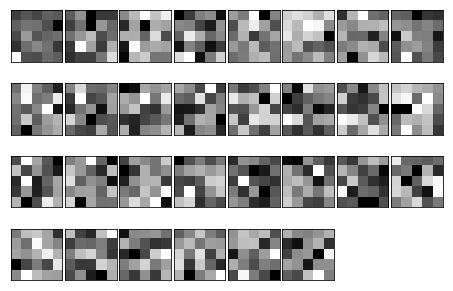

学習後


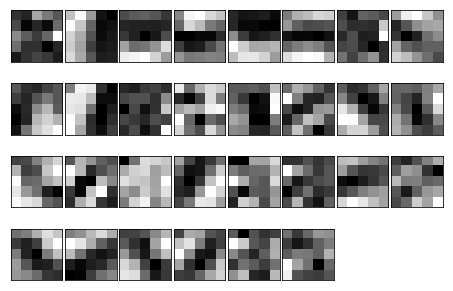

In [10]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# ランダム初期化後の重み
print("ランダム初期化後")
filter_show(network.params['W1'])

# 学習後の重み
print("学習後")
network.load_params("params.pkl")
filter_show(network.params['W1'])

規則性のあるフィルタは、エッジ（色が変化する境目）やブロブ（塊のある領域）などに反応する。以下の例では縦と横のエッジに反応する学習済みフィルタ2つを使って畳み込み処理を行った結果を表示している。
<img src="./img/7-6-1.png" />

# 階層構造による情報抽出

層を重ねることによって、一層目のエッジやブロブなどの低レベルな情報から、テクスチャー、物体のパーツを抽出する。最終的には物体のクラス（ニワトリ、船、ディナーテーブル、食品店）に反応する。

<img src="./img/7-6-2.png" />

# 代表的なCNN(7.7)

LeNetやAlexNetを始めとする、様々なCNNが近年発表されている。
- LeNet (1998)
- AlexNet (2012)
- ZF Net (2013)
- VGG Net (2014)
- GoogLeNet (2015)
- Microsoft Resnet (2015)
- Region Based CNNs (R-CNN - 2013, Fast R-CNN 2015, Faster R-CNN 2015)
- Generative Adversarial Networks (2014)

## LeNet(7.7.1)
手書き数字認識を行うネットワークとして、1998年にYann LeCunによって発表された、CNNの元祖。シグモイド関数を使う点で、ReLU主体の現在のCNNと異なる。さらに、Maxプーリングに変わり、サブサンプリングが使用されていた。

## AlexNet(7.7.2)
2012年にAlex Krizhevskyが率いるチームによって発表された。ImageNetのデータを元に学習させたもの、ReLUを活性化関数として用いる。LRN(Local Response Normalization)という、局所的正規化を行う層を持っているほか、Dropoutを使用するのが特徴。当時コンピューター技術（GPU）に大きな進歩があった他、ビッグデータが一般にも浸透したため、近年のディープラーニングの火付け役となった。ちなみに、AlexNetは２つのGeForce GTX580 GPU上で５−６日間学習した。
